# __Housing Prices Prediction Regression__

# Importing Libraries and Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import math
import matplotlib

print(f"Pandas Version : Pandas {pd.__version__}") #print("Pandas Version : Pandas {}" ,pd.__version__ )
print(f"Numpy Version : Numpy {np.__version__}")
print(f"Matplotlib Version : Matplotlib {matplotlib.__version__}")
print(f"Seaborn Version : Seaborn {sns.__version__}")
%matplotlib inline

Pandas Version : Pandas 1.0.5
Numpy Version : Numpy 1.18.5
Matplotlib Version : Matplotlib 3.2.2
Seaborn Version : Seaborn 0.10.1


# Importing The Dataset

In [2]:
HousePrices = pd.read_csv('housetrain.csv')

In [3]:
pd.set_option('display.max_columns',90)

In [4]:
HousePrices.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Categorical and Numerical Column 

In [5]:
Categorical_Type_Columns = HousePrices.select_dtypes(include = 'object').columns

In [6]:
Numerical_Type_Columns = HousePrices.select_dtypes(exclude = 'object').columns

In [7]:
Categorical_Type_Columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [8]:
Numerical_Type_Columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

# Removal of Garbage Column

In [9]:
HousePrices = HousePrices.drop(['Id','YearBuilt','YearRemodAdd','GarageYrBlt','MoSold','YrSold'], axis = 1)
HousePrices

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,NaN,NaN,NaN,0,WD,Normal,142125


## Continuous Column and Categorical Column Separation

In [10]:
Continuous_Column = HousePrices[['LotFrontage', 'LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal']]

In [11]:
Continuous_Column.columns

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal'],
      dtype='object')

In [12]:
Categorical_Column = HousePrices[['MSSubClass','MSZoning','Street','Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','OverallQual','OverallCond','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','KitchenQual','Functional','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','PoolQC','Fence','MiscFeature','SaleType','SaleCondition']]

In [13]:
Categorical_Column.columns

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType',
       'SaleCondition'],
      dtype='object')

# Null Values Detection

## Continuous_Column

In [14]:
Missing_Continuous_Column = HousePrices[Continuous_Column.columns].isnull().sum().to_frame()
Missing_Continuous_Column

,0
LotFrontage,259
LotArea,0
MasVnrArea,8
BsmtFinSF1,0
BsmtFinSF2,0
BsmtUnfSF,0
TotalBsmtSF,0
1stFlrSF,0
2ndFlrSF,0
LowQualFinSF,0


 * __Columns LotFrontage and MasVnrArea is having missing values__

*  __proportion of missing value in column LotFrontage is 259 out of 1460 rows, column should be  dropped__

* __Proportion of missing value in column MasVnrArea is 8 out of 1460 rows, column should'nt be dropped instead replaced with median value__

## Continuous Column Handling 

In [15]:
HousePrices = HousePrices.drop(['LotFrontage'], axis = 1)
HousePrices

,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,SaleType,SaleCondition,SalePrice
0,60,RL,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,WD,Normal,208500
1,20,RL,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,WD,Normal,181500
2,60,RL,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,WD,Normal,223500
3,70,RL,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,WD,Abnorml,140000
4,60,RL,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,WD,Normal,175000
1456,20,RL,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,WD,Normal,210000
1457,70,RL,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,WD,Normal,266500
1458,20,RL,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,NaN,NaN,NaN,0,WD,Normal,142125


In [16]:
HousePrices.loc[(pd.isnull(HousePrices['MasVnrArea'])),'MasVnrArea'] = HousePrices[~(pd.isnull(HousePrices['MasVnrArea']))]['MasVnrArea'].median()

## Categorical_Column

In [17]:
Missing_Categorical_Column = HousePrices[Categorical_Column.columns].isnull().sum().to_frame()
Missing_Categorical_Column

,0
MSSubClass,0
MSZoning,0
Street,0
Alley,1369
LotShape,0
LandContour,0
Utilities,0
LotConfig,0
LandSlope,0
Neighborhood,0


* __Columns Alley, MasVnrType, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, Electrical, FireplaceQu, GarageType, GarageFinish, GarageQual, GarageCond, PoolQC, Fence, MisFeature are having missing values__

* __Columns Alley, FireplaceQu, Fence, MiscFeature are having high proportion of missing values__

* __Column PoolQC is also having missing values which is not present in the first place but its value is replaced with zero based on the value of PoolArea Column__

* __Columns  MasVnrType, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, Electrical, GarageType, GarageFinish, GarageQual, GarageCond are having missing values which is replaced with its mode value__

## Categorical Column Handling 

In [18]:
HousePrices = HousePrices.drop(['Alley','FireplaceQu','Fence','MiscFeature'], axis = 1)
HousePrices

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,SaleType,SaleCondition,SalePrice
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,0,WD,Normal,208500
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,0,WD,Normal,181500
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,0,WD,Normal,223500
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,0,WD,Abnorml,140000
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,0,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,Attchd,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,0,WD,Normal,175000
1456,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,Attchd,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,0,WD,Normal,210000
1457,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Attchd,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,2500,WD,Normal,266500
1458,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,Attchd,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,NaN,0,WD,Normal,142125


In [19]:
HousePrices['PoolQC'] = HousePrices['PoolQC'].fillna(0)

In [20]:
HousePrices['PoolQC'].value_counts()

0     1453
Gd       3
Ex       2
Fa       2
Name: PoolQC, dtype: int64

In [21]:
import statistics

In [22]:
Cols = ['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond' ]

In [23]:
ColCount = HousePrices[['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']]

In [24]:
for i in ColCount.columns:
    x = ColCount[i].value_counts()
    print('Column name is :', i ,' and its value is :', x[0])
    print(x)

Column name is : MasVnrType  and its value is : 864
None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64
Column name is : BsmtQual  and its value is : 649
TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64
Column name is : BsmtCond  and its value is : 1311
TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64
Column name is : BsmtExposure  and its value is : 953
No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64
Column name is : BsmtFinType1  and its value is : 430
Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64
Column name is : BsmtFinType2  and its value is : 1256
Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64
Column name is : Electrical  and its value is : 1334
SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64
Column name is : Gar

In [25]:
HousePrices['MasVnrType'] = HousePrices['MasVnrType'].fillna(value = 'None')

In [26]:
HousePrices['BsmtQual'] = HousePrices['BsmtQual'].fillna(value = 'TA')

In [27]:
HousePrices['BsmtCond'] = HousePrices['BsmtCond'].fillna(value = 'TA')

In [28]:
HousePrices['BsmtExposure'] = HousePrices['BsmtExposure'].fillna(value = 'No')

In [29]:
HousePrices['BsmtFinType1'] = HousePrices['BsmtFinType1'].fillna(value = 'Unf')

In [30]:
HousePrices['BsmtFinType2'] = HousePrices['BsmtFinType2'].fillna(value = 'Unf')

In [31]:
HousePrices['Electrical'] = HousePrices['Electrical'].fillna(value = 'SBrkr')

In [32]:
HousePrices['GarageType'] = HousePrices['GarageType'].fillna(value = 'Attchd')

In [33]:
HousePrices['GarageFinish'] = HousePrices['GarageFinish'].fillna(value = 'Unf')

In [34]:
HousePrices['GarageQual'] = HousePrices['GarageQual'].fillna(value = 'TA')

In [35]:
HousePrices['GarageCond'] = HousePrices['GarageCond'].fillna(value = 'TA')

## Checking For Missing Value After Data Handling

In [36]:
HousePrices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 70 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotArea        1460 non-null   int64  
 3   Street         1460 non-null   object 
 4   LotShape       1460 non-null   object 
 5   LandContour    1460 non-null   object 
 6   Utilities      1460 non-null   object 
 7   LotConfig      1460 non-null   object 
 8   LandSlope      1460 non-null   object 
 9   Neighborhood   1460 non-null   object 
 10  Condition1     1460 non-null   object 
 11  Condition2     1460 non-null   object 
 12  BldgType       1460 non-null   object 
 13  HouseStyle     1460 non-null   object 
 14  OverallQual    1460 non-null   int64  
 15  OverallCond    1460 non-null   int64  
 16  RoofStyle      1460 non-null   object 
 17  RoofMatl       1460 non-null   object 
 18  Exterior

* __There is no missing value after handling the data by dropping some columns and replacing some values with the mode value of that particular column__

# Skewness Detection And Handling

In [37]:
Continuous_Column_Skewness = HousePrices[['LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal']]
Continuous_Column_Skewness.columns

Index(['LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal'],
      dtype='object')

In [38]:
import warnings
warnings.filterwarnings('ignore')

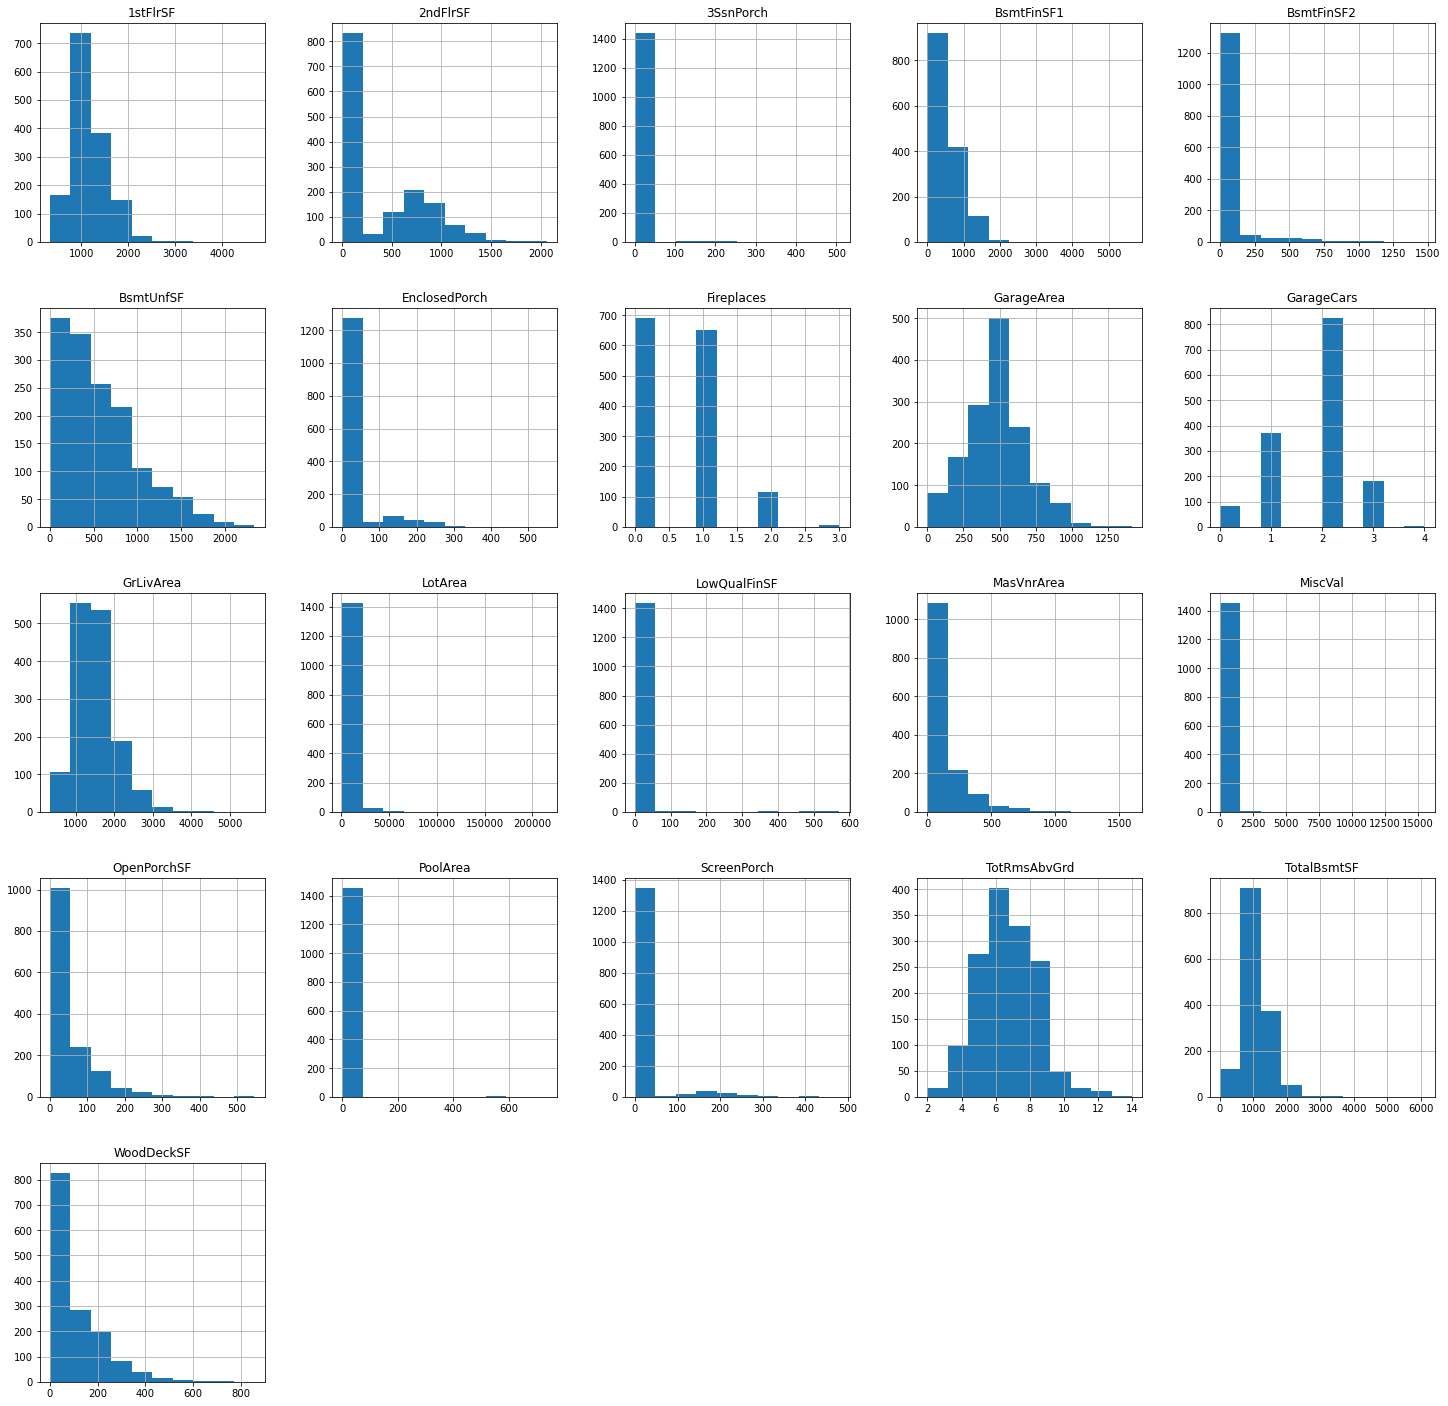

In [39]:
Continuous_Column_Skewness.hist(figsize = (25,25))
plt.show()

* __After plotting histogram of all the columns, columns 3SsnPorch, BsmtFinSF2, EnclosedPorch, LowQualFinSF, MiscVal, ScreenPorch, LotArea are having skewed data distribution__

* __Skewed data can be handlled by logarthmic transformation__

* __PoolArea column is the exception which the data are not present in the first place which is replaced with 0__

## Logarthmic Tranformation Of Skewed Columns  

In [40]:
HousePrices['Log_3SsnPorch'] = np.log(HousePrices['3SsnPorch'] + 0.01)

In [41]:
HousePrices['Log_ScreenPorch'] = np.log(HousePrices['ScreenPorch'] + 0.01)

In [42]:
HousePrices['Log_EnclosedPorch'] = np.log(HousePrices['EnclosedPorch'] + 0.01)

In [43]:
HousePrices['Log_LowQualFinSF'] = np.log(HousePrices['LowQualFinSF'] + 0.01)

In [44]:
HousePrices['Log_MiscVal'] = np.log(HousePrices['MiscVal'] + 0.01)

In [45]:
HousePrices['Log_BsmtFinSF2'] = np.log(HousePrices['BsmtFinSF2'] + 0.01)

In [46]:
Continuous_Log_Column_Skewness = HousePrices[['LotArea','MasVnrArea','BsmtFinSF1','Log_BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','Log_LowQualFinSF','GrLivArea','TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','Log_EnclosedPorch','Log_3SsnPorch','Log_ScreenPorch','PoolArea','Log_MiscVal']]
Continuous_Log_Column_Skewness.columns

Index(['LotArea', 'MasVnrArea', 'BsmtFinSF1', 'Log_BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'Log_LowQualFinSF', 'GrLivArea',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'Log_EnclosedPorch', 'Log_3SsnPorch', 'Log_ScreenPorch',
       'PoolArea', 'Log_MiscVal'],
      dtype='object')

In [47]:
import warnings
warnings.filterwarnings('ignore')

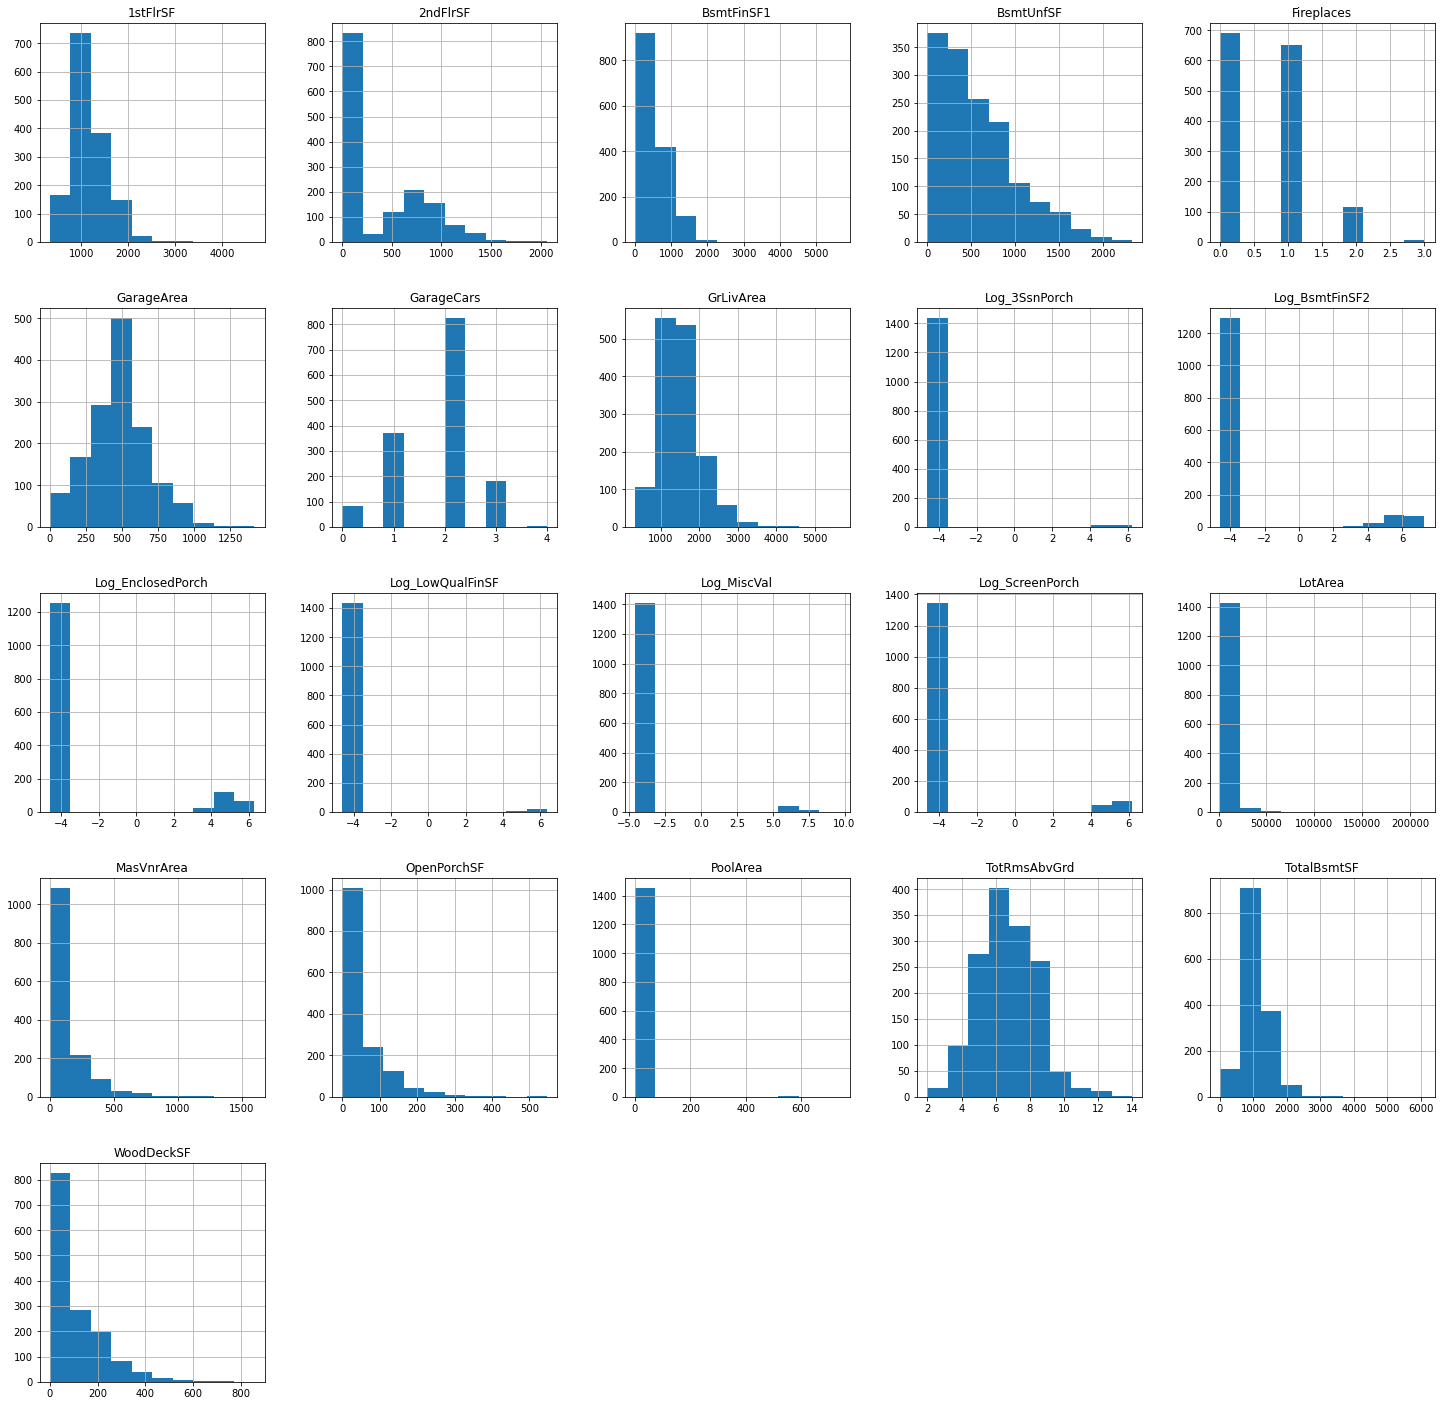

In [48]:
Continuous_Log_Column_Skewness.hist(figsize = (25,25))
plt.show()

* __Even after doing logarthmic transformation there is no significant change in the data distribution, considering the distribution ands its importance we now remove columns such as MiscVal, LowQualFinSF, BsmtFinSF2, EnclosedPorch, 3SsnPorch, ScreenPorch__

* __We drop such insignificant columns__

In [49]:
HousePrices =  HousePrices.drop(['Log_BsmtFinSF2','Log_LowQualFinSF','Log_EnclosedPorch','Log_3SsnPorch','Log_ScreenPorch','Log_MiscVal','BsmtFinSF2','LowQualFinSF','EnclosedPorch','3SsnPorch','ScreenPorch','MiscVal'], axis = 1)
HousePrices.columns

Index(['MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'PoolArea', 'PoolQC', 'SaleType', 'SaleCondition', 'SalePrice'],
      dtype='object')

# Outlier Detection And Handling

In [50]:
Continuous_Column_Outliers = HousePrices[['LotArea','MasVnrArea','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','PoolArea','WoodDeckSF','OpenPorchSF']]
Continuous_Column_Outliers.columns

Index(['LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'PoolArea', 'WoodDeckSF', 'OpenPorchSF'],
      dtype='object')

## Quartile Ranges, Upper Limit, Lower Limit & Outlier Handling 

## __LotArea__

21450.25
-7282.25
4048.0
11601.5
7553.5


count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64

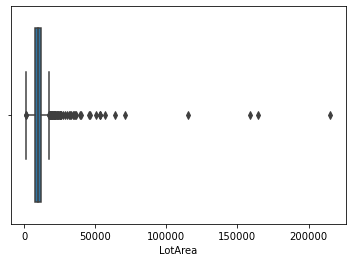

In [51]:
q1,q3 = np.percentile(HousePrices['LotArea'], [25, 75])
iqr = q3 - q1
Upper_Limit = iqr + (q3 * 1.5)
Lower_Limit = iqr - (q1 * 1.5)
print(Upper_Limit)
print(Lower_Limit)
print(iqr)
print(q3)
print(q1)
sns.boxplot(HousePrices['LotArea'])
HousePrices['LotArea'].describe()

In [52]:
len(HousePrices[(HousePrices['LotArea']<=q3 + 1.5*iqr)&(HousePrices['LotArea']>=q1 - 1.5*iqr)])/len(HousePrices)
HousePrices['LotArea'] = np.where(HousePrices['LotArea'] > 21450, 21450, HousePrices['LotArea'])
HousePrices['LotArea'].describe()

count     1460.000000
mean      9791.371233
std       3966.129776
min       1300.000000
25%       7553.500000
50%       9478.500000
75%      11601.500000
max      21450.000000
Name: LotArea, dtype: float64

## __MasVnrArea__

410.625
164.25
164.25
164.25
0.0


count    1460.000000
mean      103.117123
std       180.731373
min         0.000000
25%         0.000000
50%         0.000000
75%       164.250000
max      1600.000000
Name: MasVnrArea, dtype: float64

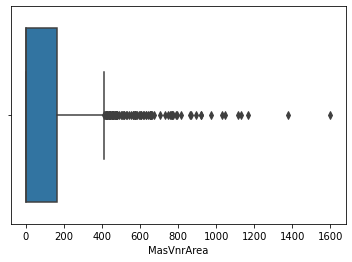

In [53]:
q1,q3 = np.percentile(HousePrices['MasVnrArea'], [25, 75])
iqr = q3 - q1
Upper_Limit = iqr + (q3 * 1.5)
Lower_Limit = iqr - (q1 * 1.5)
print(Upper_Limit)
print(Lower_Limit)
print(iqr)
print(q3)
print(q1)
sns.boxplot(HousePrices['MasVnrArea'])
HousePrices['MasVnrArea'].describe()

In [54]:
len(HousePrices[(HousePrices['MasVnrArea']<=q3 + 1.5*iqr)&(HousePrices['MasVnrArea']>=q1 - 1.5*iqr)])/len(HousePrices)
HousePrices['MasVnrArea'] = np.where(HousePrices['MasVnrArea'] > 1100, 1100, HousePrices['MasVnrArea'])
HousePrices['MasVnrArea'].describe()

count    1460.000000
mean      102.506164
std       176.680792
min         0.000000
25%         0.000000
50%         0.000000
75%       164.250000
max      1100.000000
Name: MasVnrArea, dtype: float64

## __BsmtFinSF1__

1780.625
712.25
712.25
712.25
0.0


count    1460.000000
mean      443.639726
std       456.098091
min         0.000000
25%         0.000000
50%       383.500000
75%       712.250000
max      5644.000000
Name: BsmtFinSF1, dtype: float64

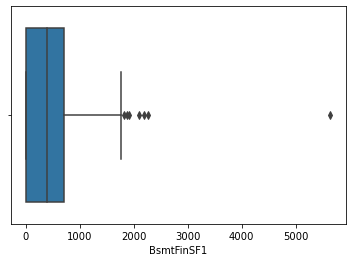

In [55]:
q1,q3 = np.percentile(HousePrices['BsmtFinSF1'], [25, 75])
iqr = q3 - q1
Upper_Limit = iqr + (q3 * 1.5)
Lower_Limit = iqr - (q1 * 1.5)
print(Upper_Limit)
print(Lower_Limit)
print(iqr)
print(q3)
print(q1)
sns.boxplot(HousePrices['BsmtFinSF1'])
HousePrices['BsmtFinSF1'].describe()

In [56]:
len(HousePrices[(HousePrices['BsmtFinSF1']<=q3 + 1.5*iqr)&(HousePrices['BsmtFinSF1']>=q1 - 1.5*iqr)])/len(HousePrices)
HousePrices['BsmtFinSF1'] = np.where(HousePrices['BsmtFinSF1'] > 1780.625, 1780.625, HousePrices['BsmtFinSF1'])
HousePrices['BsmtFinSF1'].describe()

count    1460.000000
mean      439.997517
std       433.219435
min         0.000000
25%         0.000000
50%       383.500000
75%       712.250000
max      1780.625000
Name: BsmtFinSF1, dtype: float64

## __BsmtUnfSF__

1797.0
250.5
585.0
808.0
223.0


count    1460.000000
mean      567.240411
std       441.866955
min         0.000000
25%       223.000000
50%       477.500000
75%       808.000000
max      2336.000000
Name: BsmtUnfSF, dtype: float64

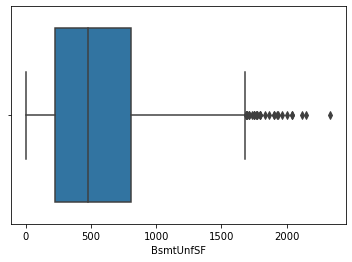

In [57]:
q1,q3 = np.percentile(HousePrices['BsmtUnfSF'], [25, 75])
iqr = q3 - q1
Upper_Limit = iqr + (q3 * 1.5)
Lower_Limit = iqr - (q1 * 1.5)
print(Upper_Limit)
print(Lower_Limit)
print(iqr)
print(q3)
print(q1)
sns.boxplot(HousePrices['BsmtUnfSF'])
HousePrices['BsmtUnfSF'].describe()

In [58]:
len(HousePrices[(HousePrices['BsmtUnfSF']<=q3 + 1.5*iqr)&(HousePrices['BsmtUnfSF']>=q1 - 1.5*iqr)])/len(HousePrices)
HousePrices['BsmtUnfSF'] = np.where(HousePrices['BsmtUnfSF'] > 2000 , 2000 , HousePrices['BsmtUnfSF'])
HousePrices['BsmtUnfSF'].describe()

count    1460.000000
mean      566.760959
std       440.187727
min         0.000000
25%       223.000000
50%       477.500000
75%       808.000000
max      2000.000000
Name: BsmtUnfSF, dtype: float64

## __TotalBsmtSF__

2449.875
-691.125
502.5
1298.25
795.75


count    1460.000000
mean     1057.429452
std       438.705324
min         0.000000
25%       795.750000
50%       991.500000
75%      1298.250000
max      6110.000000
Name: TotalBsmtSF, dtype: float64

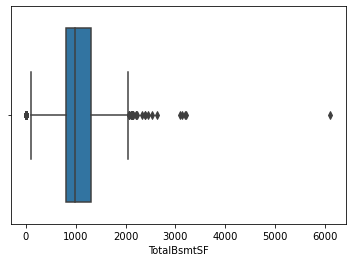

In [59]:
q1,q3 = np.percentile(HousePrices['TotalBsmtSF'], [25, 75])
iqr = q3 - q1
Upper_Limit = iqr + (q3 * 1.5)
Lower_Limit = iqr - (q1 * 1.5)
print(Upper_Limit)
print(Lower_Limit)
print(iqr)
print(q3)
print(q1)
sns.boxplot(HousePrices['TotalBsmtSF'])
HousePrices['TotalBsmtSF'].describe()

In [60]:
len(HousePrices[(HousePrices['TotalBsmtSF']<=q3 + 1.5*iqr)&(HousePrices['TotalBsmtSF']>=q1 - 1.5*iqr)])/len(HousePrices)
HousePrices['TotalBsmtSF'] = np.where(HousePrices['TotalBsmtSF'] > 2449, 2449, HousePrices['TotalBsmtSF'])
HousePrices['TotalBsmtSF'].describe()

count    1460.000000
mean     1052.797945
std       411.021454
min         0.000000
25%       795.750000
50%       991.500000
75%      1298.250000
max      2449.000000
Name: TotalBsmtSF, dtype: float64

## __1stFlrSF__

2596.125
-813.75
509.25
1391.25
882.0


count    1460.000000
mean     1162.626712
std       386.587738
min       334.000000
25%       882.000000
50%      1087.000000
75%      1391.250000
max      4692.000000
Name: 1stFlrSF, dtype: float64

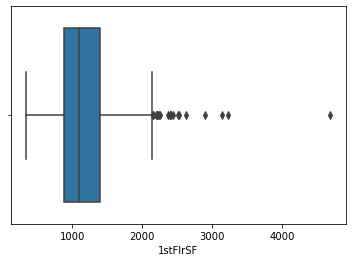

In [61]:
q1,q3 = np.percentile(HousePrices['1stFlrSF'], [25, 75])
iqr = q3 - q1
Upper_Limit = iqr + (q3 * 1.5)
Lower_Limit = iqr - (q1 * 1.5)
print(Upper_Limit)
print(Lower_Limit)
print(iqr)
print(q3)
print(q1)
sns.boxplot(HousePrices['1stFlrSF'])
HousePrices['1stFlrSF'].describe()

In [62]:
len(HousePrices[(HousePrices['1stFlrSF']<=q3 + 1.5*iqr)&(HousePrices['1stFlrSF']>=q1 - 1.5*iqr)])/len(HousePrices)
HousePrices['1stFlrSF'] = np.where(HousePrices['1stFlrSF'] > 2596, 2596, HousePrices['1stFlrSF'])
HousePrices['1stFlrSF'].describe()

count    1460.000000
mean     1160.154795
std       372.562840
min       334.000000
25%       882.000000
50%      1087.000000
75%      1391.250000
max      2596.000000
Name: 1stFlrSF, dtype: float64

## __2ndFlrSF__

1820.0
728.0
728.0
728.0
0.0


count    1460.000000
mean      346.992466
std       436.528436
min         0.000000
25%         0.000000
50%         0.000000
75%       728.000000
max      2065.000000
Name: 2ndFlrSF, dtype: float64

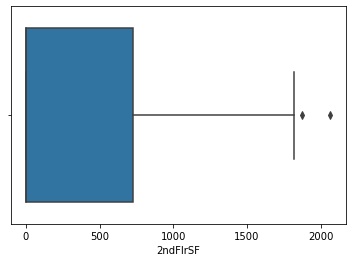

In [63]:
q1,q3 = np.percentile(HousePrices['2ndFlrSF'], [25, 75])
iqr = q3 - q1
Upper_Limit = iqr + (q3 * 1.5)
Lower_Limit = iqr - (q1 * 1.5)
print(Upper_Limit)
print(Lower_Limit)
print(iqr)
print(q3)
print(q1)
sns.boxplot(HousePrices['2ndFlrSF'])
HousePrices['2ndFlrSF'].describe()

In [64]:
len(HousePrices[(HousePrices['2ndFlrSF']<=q3 + 1.5*iqr)&(HousePrices['2ndFlrSF']>=q1 - 1.5*iqr)])/len(HousePrices)
HousePrices['2ndFlrSF'] = np.where(HousePrices['2ndFlrSF'] > 1820, 1820, HousePrices['2ndFlrSF'])
HousePrices['2ndFlrSF'].describe()

count    1460.000000
mean      346.789041
std       435.791621
min         0.000000
25%         0.000000
50%         0.000000
75%       728.000000
max      1820.000000
Name: 2ndFlrSF, dtype: float64

## __GrLivArea__

3312.375
-1047.0
647.25
1776.75
1129.5


count    1460.000000
mean     1515.463699
std       525.480383
min       334.000000
25%      1129.500000
50%      1464.000000
75%      1776.750000
max      5642.000000
Name: GrLivArea, dtype: float64

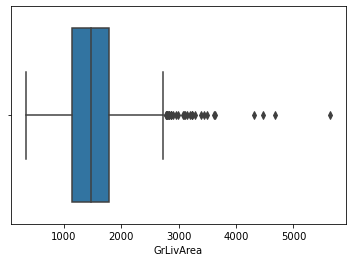

In [65]:
q1,q3 = np.percentile(HousePrices['GrLivArea'], [25, 75])
iqr = q3 - q1
Upper_Limit = iqr + (q3 * 1.5)
Lower_Limit = iqr - (q1 * 1.5)
print(Upper_Limit)
print(Lower_Limit)
print(iqr)
print(q3)
print(q1)
sns.boxplot(HousePrices['GrLivArea'])
HousePrices['GrLivArea'].describe()

In [66]:
len(HousePrices[(HousePrices['GrLivArea']<=q3 + 1.5*iqr)&(HousePrices['GrLivArea']>=q1 - 1.5*iqr)])/len(HousePrices)
HousePrices['GrLivArea'] = np.where(HousePrices['GrLivArea'] > 3312.375, 3312.375, HousePrices['GrLivArea'])
HousePrices['GrLivArea'].describe()

count    1460.000000
mean     1510.759161
std       502.402951
min       334.000000
25%      1129.500000
50%      1464.000000
75%      1776.750000
max      3312.375000
Name: GrLivArea, dtype: float64

## __TotRmsAbvGrd__

12.5
-5.5
2.0
7.0
5.0


count    1460.000000
mean        6.517808
std         1.625393
min         2.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        14.000000
Name: TotRmsAbvGrd, dtype: float64

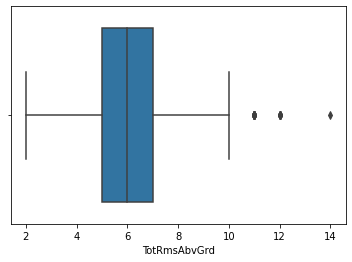

In [67]:
q1,q3 = np.percentile(HousePrices['TotRmsAbvGrd'], [25, 75])
iqr = q3 - q1
Upper_Limit = iqr + (q3 * 1.5)
Lower_Limit = iqr - (q1 * 1.5)
print(Upper_Limit)
print(Lower_Limit)
print(iqr)
print(q3)
print(q1)
sns.boxplot(HousePrices['TotRmsAbvGrd'])
HousePrices['TotRmsAbvGrd'].describe()

In [68]:
len(HousePrices[(HousePrices['TotRmsAbvGrd']<=q3 + 1.5*iqr)&(HousePrices['TotRmsAbvGrd']>=q1 - 1.5*iqr)])/len(HousePrices)
HousePrices['TotRmsAbvGrd'] = np.where(HousePrices['TotRmsAbvGrd'] > 11, 11, HousePrices['TotRmsAbvGrd'])
HousePrices['TotRmsAbvGrd'].describe()

count    1460.000000
mean        6.508219
std         1.594392
min         2.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        11.000000
Name: TotRmsAbvGrd, dtype: float64

## __Fireplaces__

2.5
1.0
1.0
1.0
0.0


count    1460.000000
mean        0.613014
std         0.644666
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: Fireplaces, dtype: float64

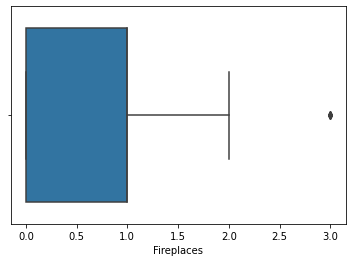

In [69]:
q1,q3 = np.percentile(HousePrices['Fireplaces'], [25, 75])
iqr = q3 - q1
Upper_Limit = iqr + (q3 * 1.5)
Lower_Limit = iqr - (q1 * 1.5)
print(Upper_Limit)
print(Lower_Limit)
print(iqr)
print(q3)
print(q1)
sns.boxplot(HousePrices['Fireplaces'])
HousePrices['Fireplaces'].describe()

In [70]:
len(HousePrices[(HousePrices['Fireplaces']<=q3 + 1.5*iqr)&(HousePrices['Fireplaces']>=q1 - 1.5*iqr)])/len(HousePrices)
HousePrices['Fireplaces'] = np.where(HousePrices['Fireplaces'] > 2.5, 2.5, HousePrices['Fireplaces'])
HousePrices['Fireplaces'].describe()

count    1460.000000
mean        0.611301
std         0.638959
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         2.500000
Name: Fireplaces, dtype: float64

## __GarageCars__

4.0
-0.5
1.0
2.0
1.0


count    1460.000000
mean        1.767123
std         0.747315
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         4.000000
Name: GarageCars, dtype: float64

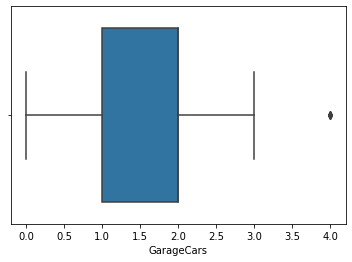

In [71]:
q1,q3 = np.percentile(HousePrices['GarageCars'], [25, 75])
iqr = q3 - q1
Upper_Limit = iqr + (q3 * 1.5)
Lower_Limit = iqr - (q1 * 1.5)
print(Upper_Limit)
print(Lower_Limit)
print(iqr)
print(q3)
print(q1)
sns.boxplot(HousePrices['GarageCars'])
HousePrices['GarageCars'].describe()

In [72]:
len(HousePrices[(HousePrices['GarageCars']<=q3 + 1.5*iqr)&(HousePrices['GarageCars']>=q1 - 1.5*iqr)])/len(HousePrices)
HousePrices['GarageCars'] = np.where(HousePrices['GarageCars'] > 4.0, 4.0, HousePrices['GarageCars'])
HousePrices['GarageCars'].describe()

count    1460.000000
mean        1.767123
std         0.747315
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         4.000000
Name: GarageCars, dtype: float64

## __GarageArea__

1105.5
-260.25
241.5
576.0
334.5


count    1460.000000
mean      472.980137
std       213.804841
min         0.000000
25%       334.500000
50%       480.000000
75%       576.000000
max      1418.000000
Name: GarageArea, dtype: float64

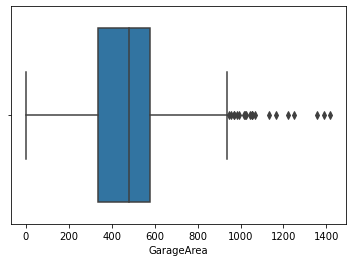

In [73]:
q1,q3 = np.percentile(HousePrices['GarageArea'], [25, 75])
iqr = q3 - q1
Upper_Limit = iqr + (q3 * 1.5)
Lower_Limit = iqr - (q1 * 1.5)
print(Upper_Limit)
print(Lower_Limit)
print(iqr)
print(q3)
print(q1)
sns.boxplot(HousePrices['GarageArea'])
HousePrices['GarageArea'].describe()

In [74]:
len(HousePrices[(HousePrices['GarageArea']<=q3 + 1.5*iqr)&(HousePrices['GarageArea']>=q1 - 1.5*iqr)])/len(HousePrices)
HousePrices['GarageArea'] = np.where(HousePrices['GarageArea'] > 1105.05, 1105.05, HousePrices['GarageArea'])
HousePrices['GarageArea'].describe()

count    1460.000000
mean      472.160514
std       210.909658
min         0.000000
25%       334.500000
50%       480.000000
75%       576.000000
max      1105.050000
Name: GarageArea, dtype: float64

## __WoodDeckSF__

420.0
168.0
168.0
168.0
0.0


count    1460.000000
mean       94.244521
std       125.338794
min         0.000000
25%         0.000000
50%         0.000000
75%       168.000000
max       857.000000
Name: WoodDeckSF, dtype: float64

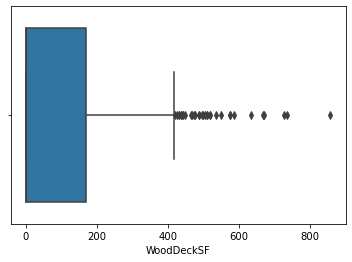

In [75]:
q1,q3 = np.percentile(HousePrices['WoodDeckSF'], [25, 75])
iqr = q3 - q1
Upper_Limit = iqr + (q3 * 1.5)
Lower_Limit = iqr - (q1 * 1.5)
print(Upper_Limit)
print(Lower_Limit)
print(iqr)
print(q3)
print(q1)
sns.boxplot(HousePrices['WoodDeckSF'])
HousePrices['WoodDeckSF'].describe()

In [76]:
len(HousePrices[(HousePrices['WoodDeckSF']<=q3 + 1.5*iqr)&(HousePrices['WoodDeckSF']>=q1 - 1.5*iqr)])/len(HousePrices)
HousePrices['WoodDeckSF'] = np.where(HousePrices['WoodDeckSF'] > 600 ,600, HousePrices['WoodDeckSF'])
HousePrices['WoodDeckSF'].describe()

count    1460.000000
mean       93.769178
std       123.093052
min         0.000000
25%         0.000000
50%         0.000000
75%       168.000000
max       600.000000
Name: WoodDeckSF, dtype: float64

## __OpenPorchSF__

170.0
68.0
68.0
68.0
0.0


count    1460.000000
mean       46.660274
std        66.256028
min         0.000000
25%         0.000000
50%        25.000000
75%        68.000000
max       547.000000
Name: OpenPorchSF, dtype: float64

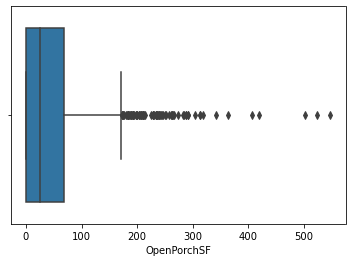

In [77]:
q1,q3 = np.percentile(HousePrices['OpenPorchSF'], [25, 75])
iqr = q3 - q1
Upper_Limit = iqr + (q3 * 1.5)
Lower_Limit = iqr - (q1 * 1.5)
print(Upper_Limit)
print(Lower_Limit)
print(iqr)
print(q3)
print(q1)
sns.boxplot(HousePrices['OpenPorchSF'])
HousePrices['OpenPorchSF'].describe()

In [78]:
len(HousePrices[(HousePrices['OpenPorchSF']<=q3 + 1.5*iqr)&(HousePrices['OpenPorchSF']>=q1 - 1.5*iqr)])/len(HousePrices)
HousePrices['OpenPorchSF'] = np.where(HousePrices['OpenPorchSF'] > 300, 300, HousePrices['OpenPorchSF'])
HousePrices['OpenPorchSF'].describe()

count    1460.000000
mean       45.942466
std        62.448944
min         0.000000
25%         0.000000
50%        25.000000
75%        68.000000
max       300.000000
Name: OpenPorchSF, dtype: float64

## __PoolArea__

0.0
0.0
0.0
0.0
0.0


count    1460.000000
mean        2.758904
std        40.177307
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       738.000000
Name: PoolArea, dtype: float64

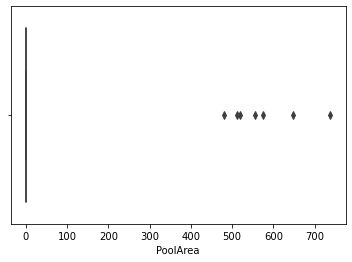

In [79]:
q1,q3 = np.percentile(HousePrices['PoolArea'], [25, 75])
iqr = q3 - q1
Upper_Limit = iqr + (q3 * 1.5)
Lower_Limit = iqr - (q1 * 1.5)
print(Upper_Limit)
print(Lower_Limit)
print(iqr)
print(q3)
print(q1)
sns.boxplot(HousePrices['PoolArea'])
HousePrices['PoolArea'].describe()

In [80]:
len(HousePrices[(HousePrices['PoolArea']<=q3 + 1.5*iqr)&(HousePrices['PoolArea']>=q1 - 1.5*iqr)])/len(HousePrices)
HousePrices['PoolArea'] = np.where(HousePrices['PoolArea'] > 100, 100, HousePrices['PoolArea'])
HousePrices['PoolArea'].describe()

count    1460.000000
mean        0.479452
std         6.909995
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       100.000000
Name: PoolArea, dtype: float64

## BoxPlot After Outlier Handling

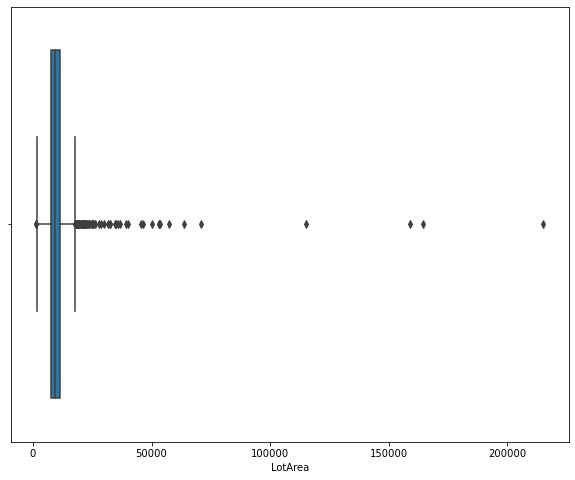

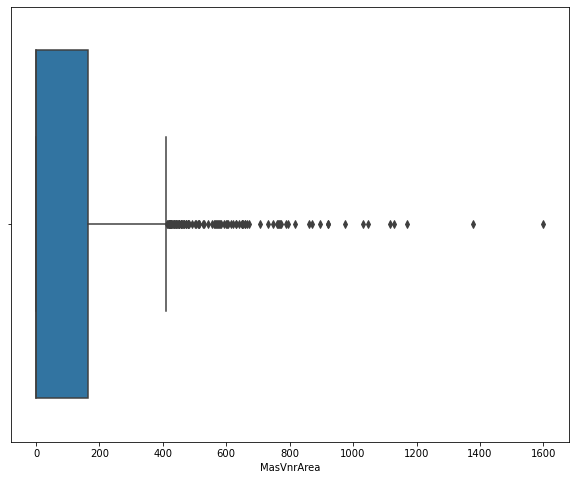

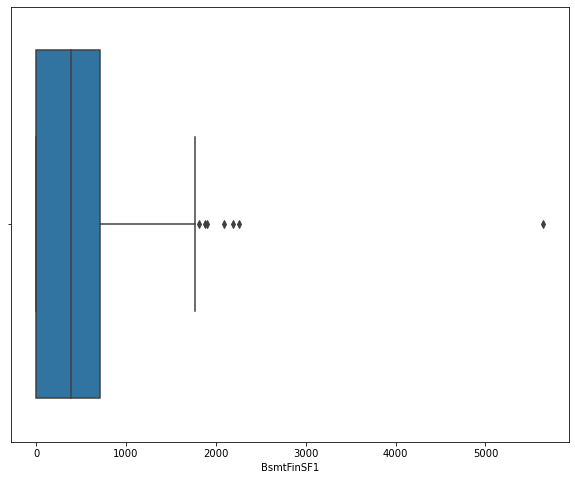

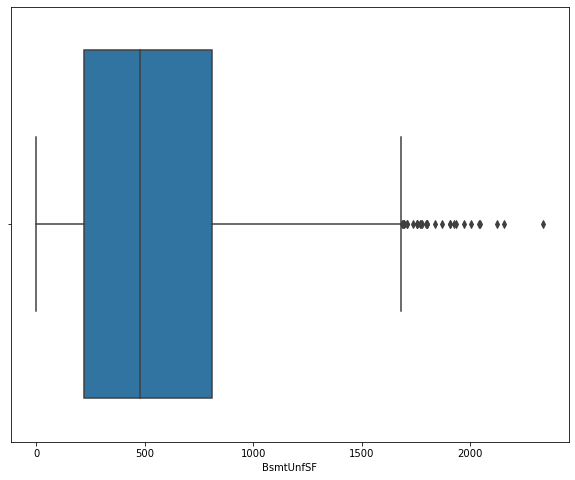

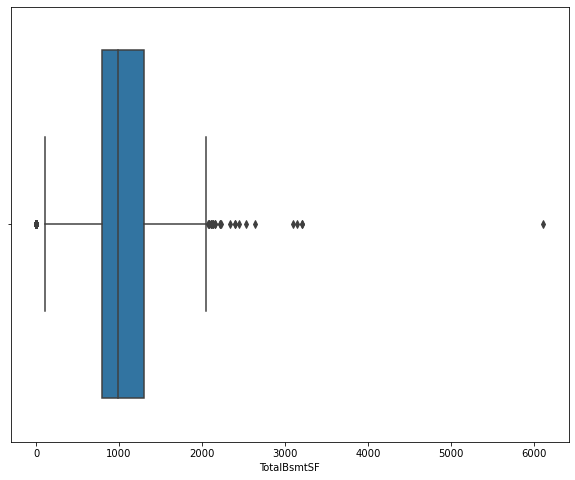

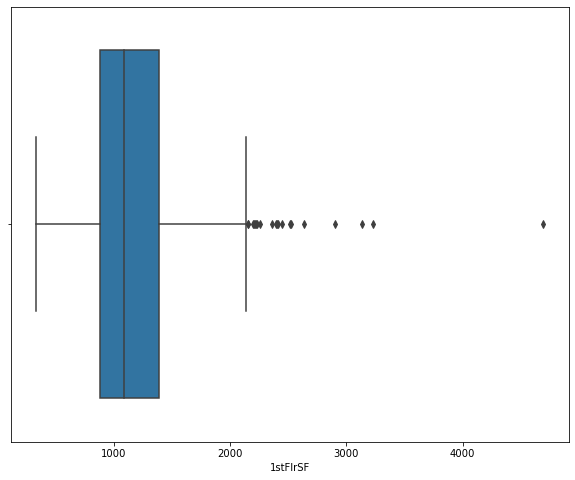

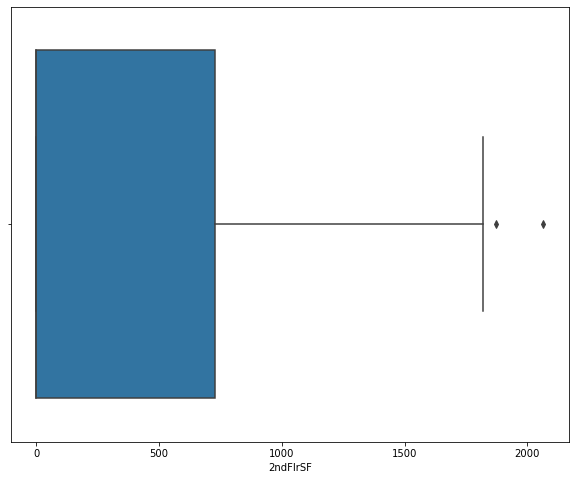

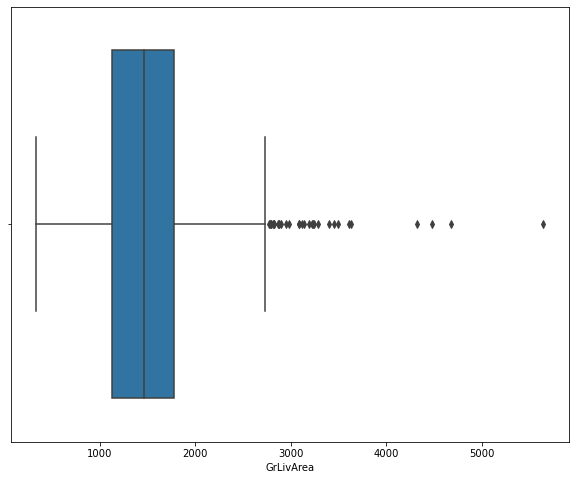

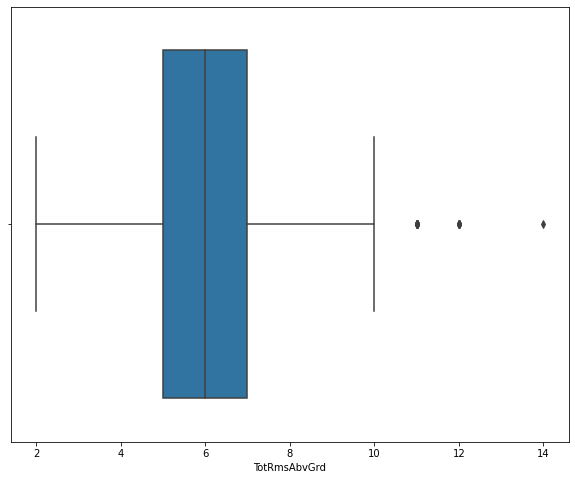

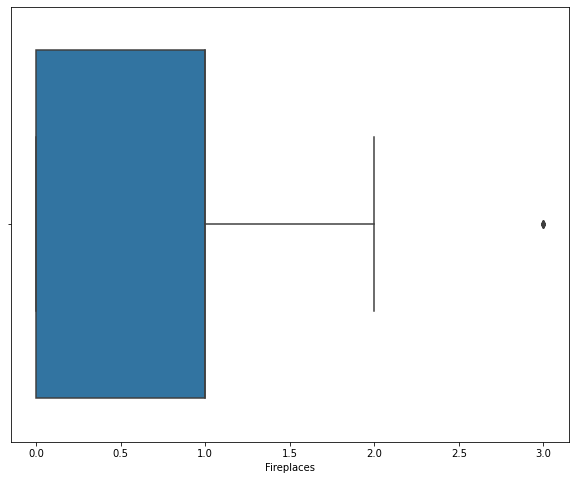

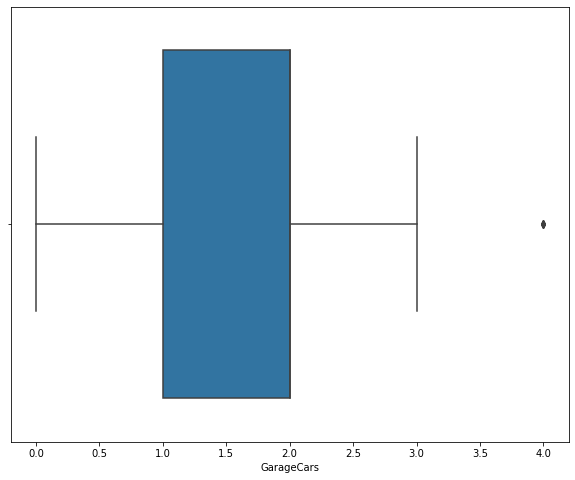

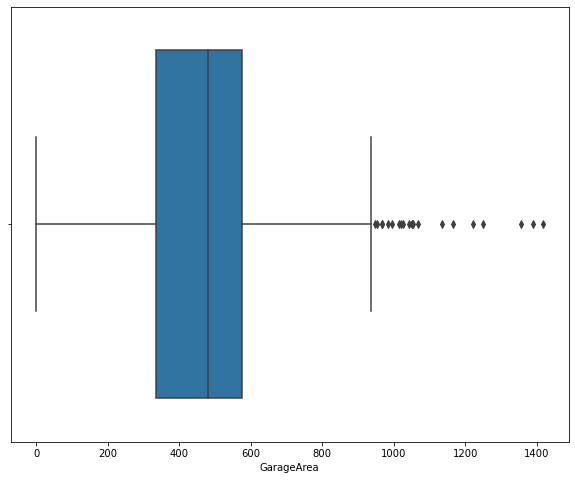

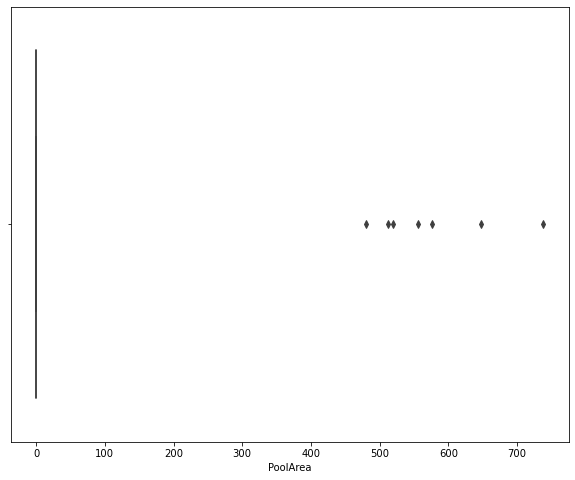

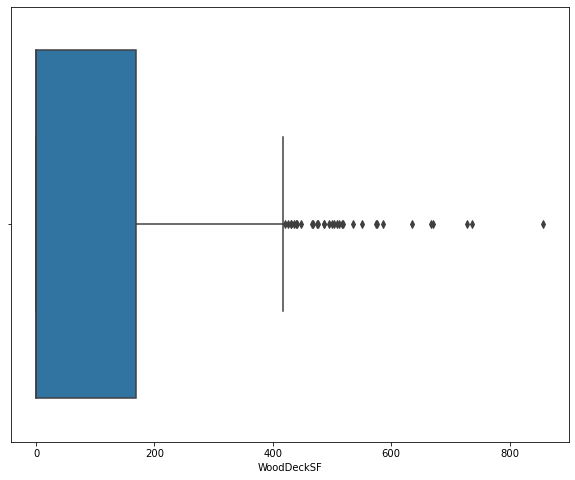

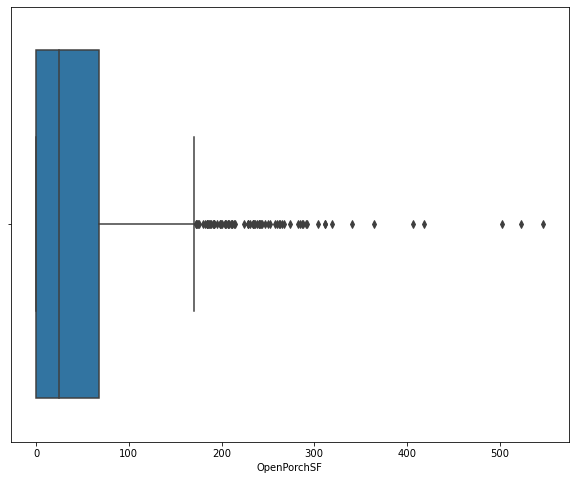

In [81]:
for cols in Continuous_Column_Outliers.columns:
    plt.figure(figsize = (10,8) )
    sns.boxplot(Continuous_Column_Outliers[cols])
    

# Correlation And Heatmap

In [82]:
Continuous_Column_Correlation = HousePrices[['SalePrice','LotArea','MasVnrArea','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','PoolArea']]
Continuous_Column_Correlation.columns

Index(['SalePrice', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'PoolArea'],
      dtype='object')

In [83]:
Correlation_Table = Continuous_Column_Correlation.corr()

In [84]:
Correlation_Table

,SalePrice,LotArea,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,PoolArea
SalePrice,1.000000,0.423295,0.474002,0.400330,0.212552,0.644575,0.624995,0.316547,0.716020,0.537836,0.468700,0.640409,0.630084,0.326258,0.332285,0.093708
LotArea,0.423295,1.000000,0.159050,0.220037,0.076841,0.351875,0.449451,0.124083,0.431531,0.377861,0.354533,0.298893,0.336406,0.207134,0.164329,0.116006
MasVnrArea,0.474002,0.159050,1.000000,0.246766,0.114098,0.359764,0.340710,0.170463,0.378630,0.284888,0.250929,0.367358,0.374302,0.167035,0.135216,0.020292
BsmtFinSF1,0.400330,0.220037,0.246766,1.000000,-0.520310,0.472537,0.402108,-0.157613,0.145860,0.020402,0.246089,0.230396,0.280438,0.206245,0.094637,0.079959
BsmtUnfSF,0.212552,0.076841,0.114098,-0.520310,1.000000,0.434164,0.325163,0.005203,0.248368,0.252804,0.052085,0.213194,0.182429,-0.004125,0.131580,-0.037345
TotalBsmtSF,0.644575,0.351875,0.359764,0.472537,0.434164,1.000000,0.808605,-0.196502,0.414932,0.276332,0.333062,0.455266,0.484954,0.240625,0.240412,0.073855
1stFlrSF,0.624995,0.449451,0.340710,0.402108,0.325163,0.808605,1.000000,-0.218844,0.539272,0.407253,0.408134,0.452360,0.486435,0.239052,0.202756,0.096908
2ndFlrSF,0.316547,0.124083,0.170463,-0.157613,0.005203,-0.196502,-0.218844,1.000000,0.693988,0.615810,0.194731,0.183466,0.140600,0.093112,0.208669,0.084681
GrLivArea,0.716020,0.431531,0.378630,0.145860,0.248368,0.414932,0.539272,0.693988,1.000000,0.836361,0.461659,0.477956,0.467397,0.250083,0.326048,0.129780
TotRmsAbvGrd,0.537836,0.377861,0.284888,0.020402,0.252804,0.276332,0.407253,0.615810,0.836361,1.000000,0.329271,0.369183,0.342102,0.171143,0.242361,0.083628


In [85]:
Correlation_Table[:1]

,SalePrice,LotArea,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,PoolArea
SalePrice,1.0,0.423295,0.474002,0.40033,0.212552,0.644575,0.624995,0.316547,0.71602,0.537836,0.4687,0.640409,0.630084,0.326258,0.332285,0.093708


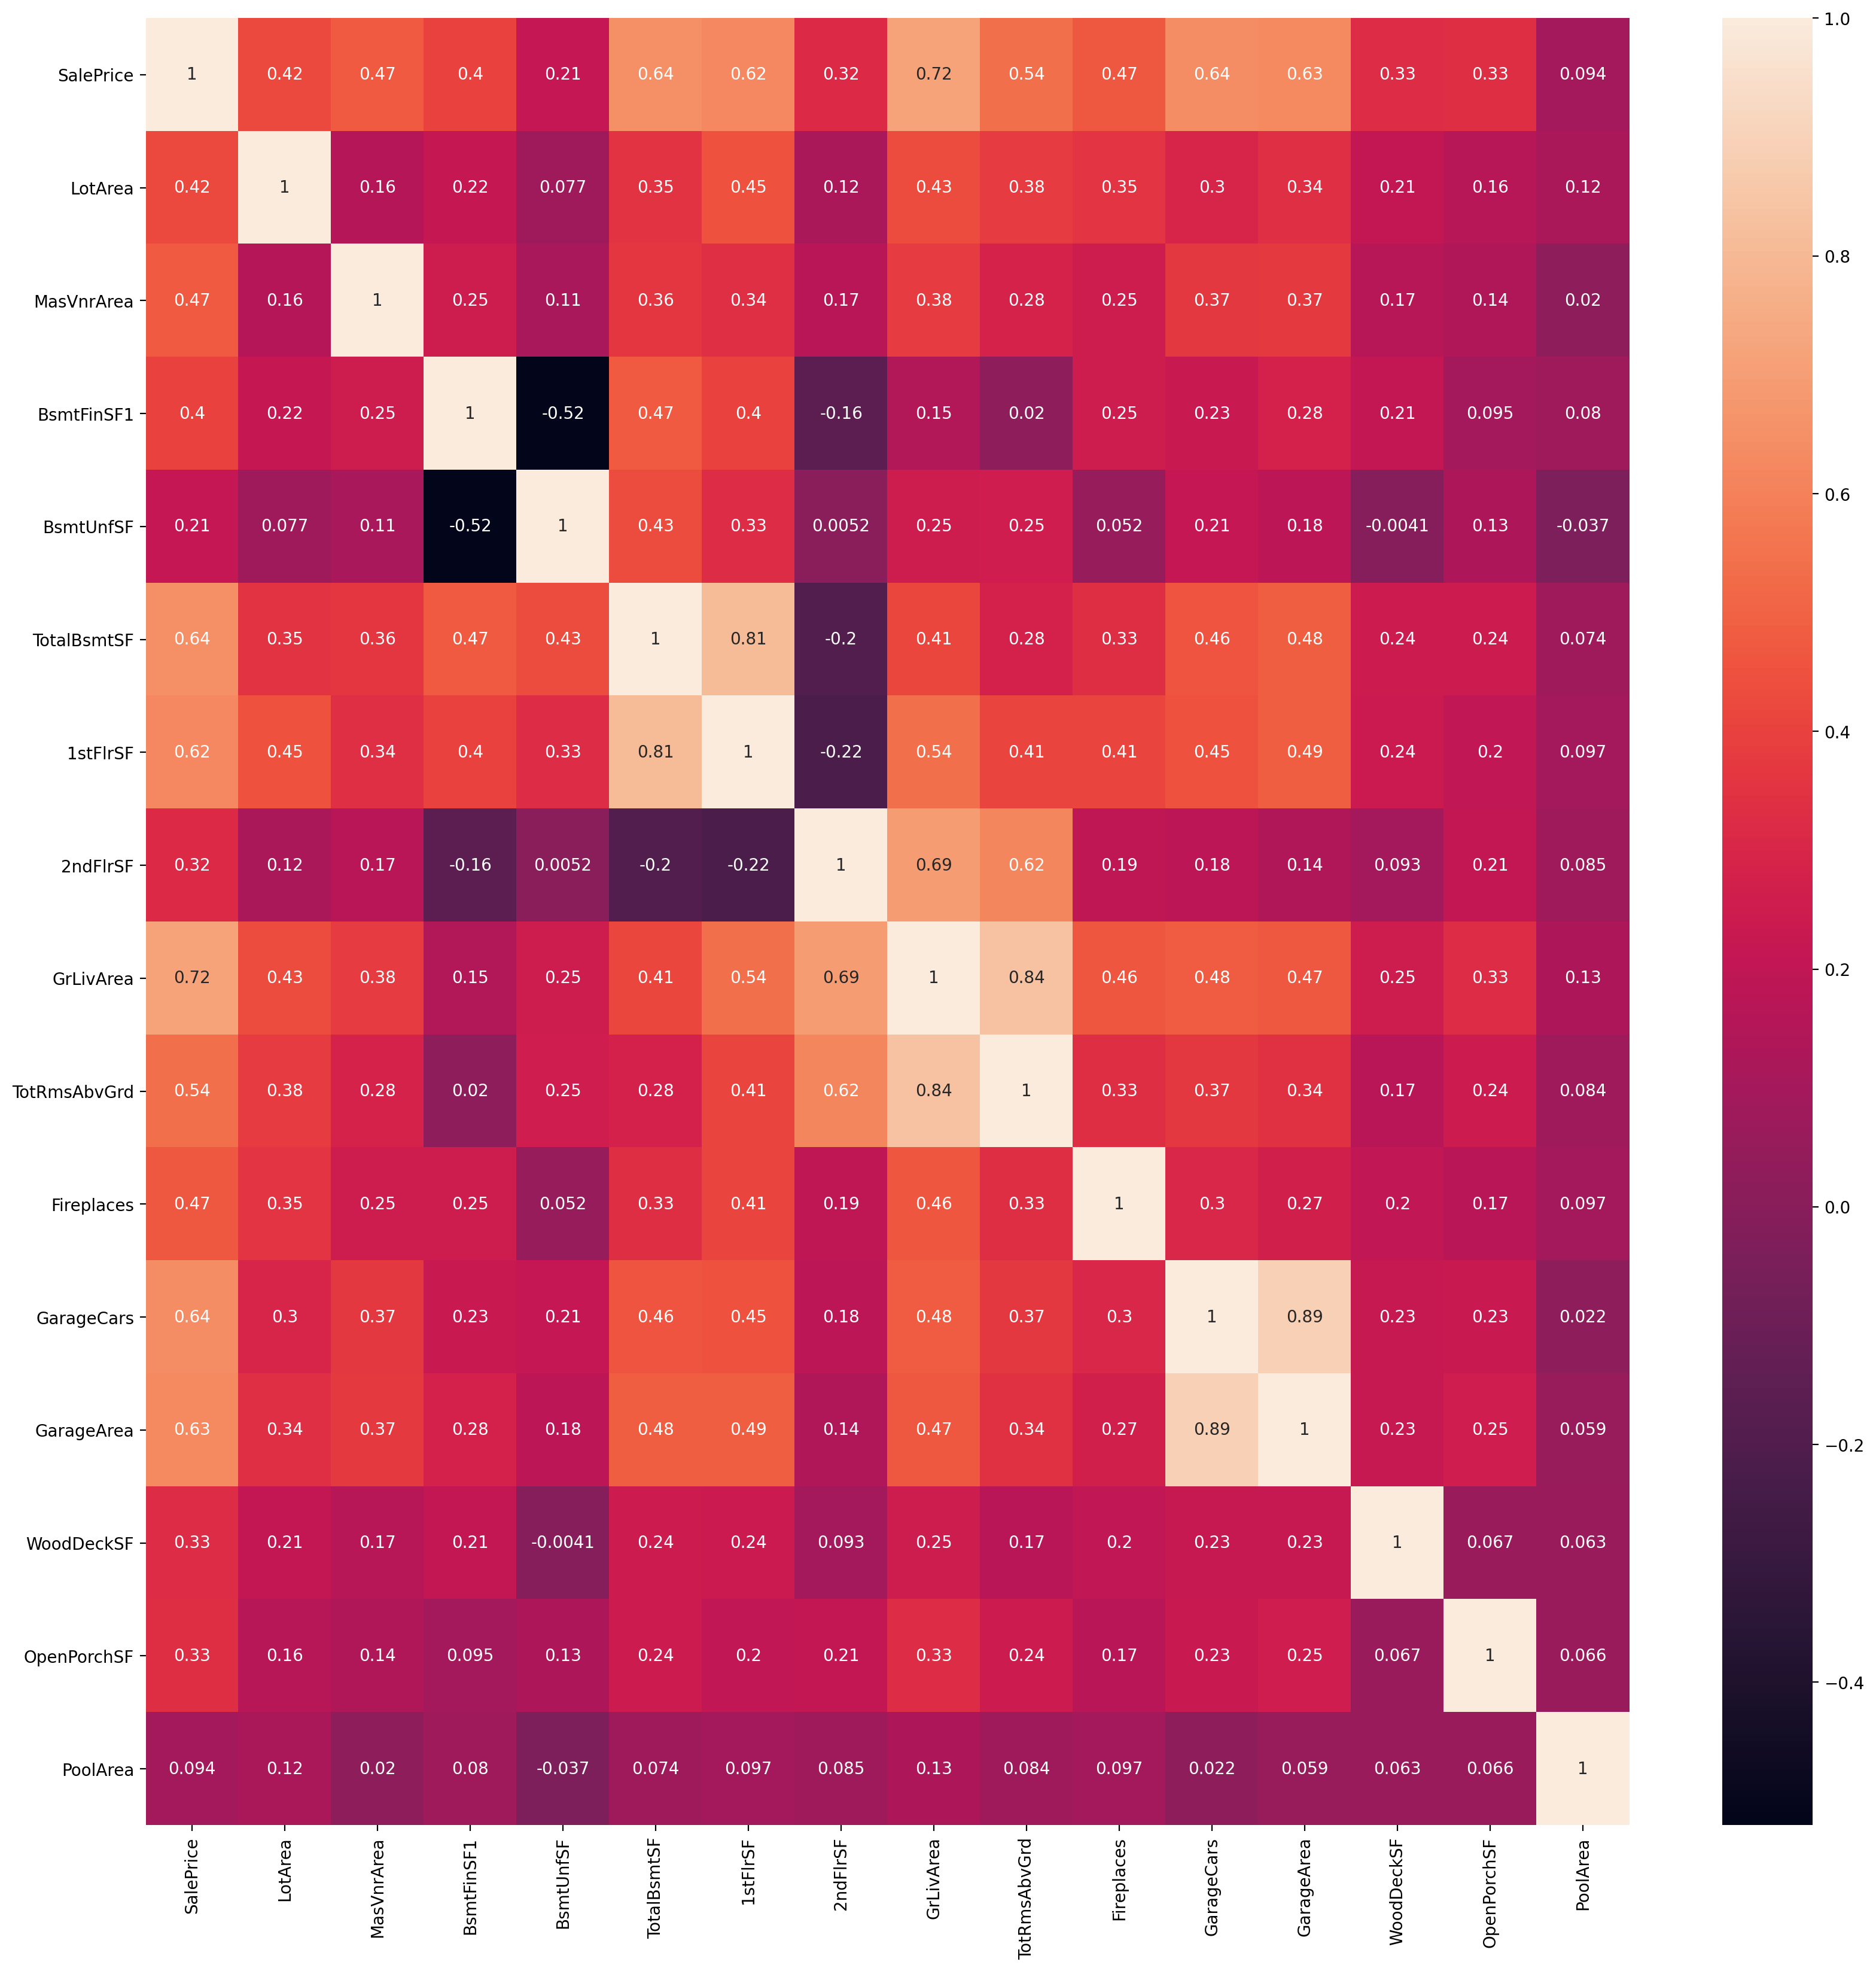

In [86]:
plt.figure(figsize = (20,20), dpi = 200)
sns.heatmap(Correlation_Table, annot = True)
plt.show()

# Categorical Data Encoding

In [87]:
Categorical_Data = HousePrices[['MSSubClass','MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','OverallQual','OverallCond','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','KitchenQual','Functional','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','PoolQC','SaleType','SaleCondition']]

In [88]:
Categorical_Data

,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,SaleType,SaleCondition
0,60,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,1,0,2,1,3,1,Gd,Typ,Attchd,RFn,TA,TA,Y,0,WD,Normal
1,20,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,0,1,2,0,3,1,TA,Typ,Attchd,RFn,TA,TA,Y,0,WD,Normal
2,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,1,0,2,1,3,1,Gd,Typ,Attchd,RFn,TA,TA,Y,0,WD,Normal
3,70,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,1,0,1,0,3,1,Gd,Typ,Detchd,Unf,TA,TA,Y,0,WD,Abnorml
4,60,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,1,0,2,1,4,1,Gd,Typ,Attchd,RFn,TA,TA,Y,0,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,0,0,2,1,3,1,TA,Typ,Attchd,RFn,TA,TA,Y,0,WD,Normal
1456,20,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,Gable,CompShg,Plywood,Plywood,Stone,TA,TA,CBlock,Gd,TA,No,ALQ,Rec,GasA,TA,Y,SBrkr,1,0,2,0,3,1,TA,Min1,Attchd,Unf,TA,TA,Y,0,WD,Normal
1457,70,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,Gable,CompShg,CemntBd,CmentBd,None,Ex,Gd,Stone,TA,Gd,No,GLQ,Unf,GasA,Ex,Y,SBrkr,0,0,2,0,4,1,Gd,Typ,Attchd,RFn,TA,TA,Y,0,WD,Normal
1458,20,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,Hip,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,TA,TA,Mn,GLQ,Rec,GasA,Gd,Y,FuseA,1,0,1,0,2,1,Gd,Typ,Attchd,Unf,TA,TA,Y,0,WD,Normal


In [89]:
set(HousePrices.columns).issuperset(Categorical_Data.columns)

True

In [90]:
Ordinal_Data = HousePrices[['Street','LotShape','LandSlope','OverallQual','OverallCond','ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC','KitchenQual','GarageQual','GarageCond','PavedDrive','PoolQC']]

In [91]:
Ordinal_Data

,Street,LotShape,LandSlope,OverallQual,OverallCond,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,GarageQual,GarageCond,PavedDrive,PoolQC
0,Pave,Reg,Gtl,7,5,Gd,TA,Gd,TA,No,GLQ,Unf,Ex,Gd,TA,TA,Y,0
1,Pave,Reg,Gtl,6,8,TA,TA,Gd,TA,Gd,ALQ,Unf,Ex,TA,TA,TA,Y,0
2,Pave,IR1,Gtl,7,5,Gd,TA,Gd,TA,Mn,GLQ,Unf,Ex,Gd,TA,TA,Y,0
3,Pave,IR1,Gtl,7,5,TA,TA,TA,Gd,No,ALQ,Unf,Gd,Gd,TA,TA,Y,0
4,Pave,IR1,Gtl,8,5,Gd,TA,Gd,TA,Av,GLQ,Unf,Ex,Gd,TA,TA,Y,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,Pave,Reg,Gtl,6,5,TA,TA,Gd,TA,No,Unf,Unf,Ex,TA,TA,TA,Y,0
1456,Pave,Reg,Gtl,6,6,TA,TA,Gd,TA,No,ALQ,Rec,TA,TA,TA,TA,Y,0
1457,Pave,Reg,Gtl,7,9,Ex,Gd,TA,Gd,No,GLQ,Unf,Ex,Gd,TA,TA,Y,0
1458,Pave,Reg,Gtl,5,6,TA,TA,TA,TA,Mn,GLQ,Rec,Gd,Gd,TA,TA,Y,0


In [92]:
Ordinal_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Street        1460 non-null   object
 1   LotShape      1460 non-null   object
 2   LandSlope     1460 non-null   object
 3   OverallQual   1460 non-null   int64 
 4   OverallCond   1460 non-null   int64 
 5   ExterQual     1460 non-null   object
 6   ExterCond     1460 non-null   object
 7   BsmtQual      1460 non-null   object
 8   BsmtCond      1460 non-null   object
 9   BsmtExposure  1460 non-null   object
 10  BsmtFinType1  1460 non-null   object
 11  BsmtFinType2  1460 non-null   object
 12  HeatingQC     1460 non-null   object
 13  KitchenQual   1460 non-null   object
 14  GarageQual    1460 non-null   object
 15  GarageCond    1460 non-null   object
 16  PavedDrive    1460 non-null   object
 17  PoolQC        1460 non-null   object
dtypes: int64(2), object(16)
memory usage: 205.4+ KB


# Encoding Ordinal Categorical Features

* __Street__

In [93]:
HousePrices['Street'].unique()

array(['Pave', 'Grvl'], dtype=object)

In [94]:
mapper = {"Pave" : 1 , "Grvl" : 0 }

In [95]:
HousePrices['Street'] = HousePrices['Street'].replace(mapper)

* __LotShape__

In [96]:
HousePrices['LotShape'].unique()

array(['Reg', 'IR1', 'IR2', 'IR3'], dtype=object)

In [97]:
mapper1 ={'Reg': 1,'IR1':2,'IR2':3,'IR3':4}

In [98]:
HousePrices['LotShape'] = HousePrices['LotShape'].replace(mapper1)

* __LandSlope__

In [99]:
HousePrices['LandSlope'].unique()

array(['Gtl', 'Mod', 'Sev'], dtype=object)

In [100]:
mapper2 ={'Gtl': 1,'Mod':2,'Sev':3}

In [101]:
HousePrices['LandSlope'] = HousePrices['LandSlope'].replace(mapper2)

* __ExterQual__

In [102]:
HousePrices['ExterQual'].unique()

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

In [103]:
mapper3 ={'Gd': 1,'TA':2,'Ex':3,'Fa':4}

In [104]:
HousePrices['ExterQual'] = HousePrices['ExterQual'].replace(mapper3)

* __ExterCond__

In [105]:
HousePrices['ExterCond'].unique()

array(['TA', 'Gd', 'Fa', 'Po', 'Ex'], dtype=object)

In [106]:
mapper4 ={'Gd': 1,'TA':2,'Ex':3,'Fa':4,'Po':5}

In [107]:
HousePrices['ExterCond'] = HousePrices['ExterCond'].replace(mapper4)

* __BsmtQual__

In [108]:
HousePrices['BsmtQual'].unique()

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

In [109]:
mapper5 ={'Gd': 1,'TA':2,'Ex':3,'Fa':4}

In [110]:
HousePrices['BsmtQual'] = HousePrices['BsmtQual'].replace(mapper5)

* __BsmtCond__

In [111]:
HousePrices['BsmtCond'].unique()

array(['TA', 'Gd', 'Fa', 'Po'], dtype=object)

In [112]:
mapper6 ={'Gd': 1,'TA':2,'Po':3,'Fa':4}

In [113]:
HousePrices['BsmtCond'] = HousePrices['BsmtCond'].replace(mapper6)

* __BsmtExposure__

In [114]:
HousePrices['BsmtExposure'].unique()

array(['No', 'Gd', 'Mn', 'Av'], dtype=object)

In [115]:
mapper7 ={'No':1,'Gd': 2,'Mn':3,'Av':4}

In [116]:
HousePrices['BsmtExposure'] = HousePrices['BsmtExposure'].replace(mapper7)

* __BsmtFinType1__

In [117]:
HousePrices['BsmtFinType1'].unique()

array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', 'LwQ'], dtype=object)

In [118]:
mapper8 ={'GLQ':1,'ALQ': 2,'Unf':3,'Rec':4,'BLQ':5,'LwQ':6}

In [119]:
HousePrices['BsmtFinType1'] = HousePrices['BsmtFinType1'].replace(mapper8)

* __BsmtFinType2__

In [120]:
HousePrices['BsmtFinType2'].unique()

array(['Unf', 'BLQ', 'ALQ', 'Rec', 'LwQ', 'GLQ'], dtype=object)

In [121]:
mapper9 ={'GLQ':1,'ALQ': 2,'Unf':3,'Rec':4,'BLQ':5,'LwQ':6}

In [122]:
HousePrices['BsmtFinType2'] = HousePrices['BsmtFinType2'].replace(mapper9)

* __HeatingQC__

In [123]:
HousePrices['HeatingQC'].unique()

array(['Ex', 'Gd', 'TA', 'Fa', 'Po'], dtype=object)

In [124]:
mapper10 ={'Gd': 1,'TA':2,'Ex':3,'Fa':4,'Po':5}

In [125]:
HousePrices['HeatingQC'] = HousePrices['HeatingQC'].replace(mapper10)

* __KitchenQual__

In [126]:
HousePrices['KitchenQual'].unique()

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

In [127]:
mapper11 ={'Gd': 1,'TA':2,'Ex':3,'Fa':4}

In [128]:
HousePrices['KitchenQual'] = HousePrices['KitchenQual'].replace(mapper11)

* __GarageQual__

In [129]:
HousePrices['GarageQual'].unique()

array(['TA', 'Fa', 'Gd', 'Ex', 'Po'], dtype=object)

In [130]:
mapper12 ={'Gd': 1,'TA':2,'Ex':3,'Fa':4,'Po':5}

In [131]:
HousePrices['GarageQual'] = HousePrices['GarageQual'].replace(mapper12)

* __GarageCond__

In [132]:
HousePrices['GarageCond'].unique()

array(['TA', 'Fa', 'Gd', 'Po', 'Ex'], dtype=object)

In [133]:
mapper13 ={'Gd': 1,'TA':2,'Ex':3,'Fa':4,'Po':5}

In [134]:
HousePrices['GarageCond'] = HousePrices['GarageCond'].replace(mapper13)

* __PavedDrive__

In [135]:
HousePrices['PavedDrive'].unique()

array(['Y', 'N', 'P'], dtype=object)

In [136]:
mapper14 ={'Y': 1,'N':2,'P':3}

In [137]:
HousePrices['PavedDrive'] = HousePrices['PavedDrive'].replace(mapper14)

* __PoolQC__

In [138]:
HousePrices['PoolQC'].unique()

array([0, 'Ex', 'Fa', 'Gd'], dtype=object)

In [139]:
mapper15 ={'Gd': 1,'Fa':2,'Ex':3}

In [140]:
HousePrices['PoolQC'] = HousePrices['PoolQC'].replace(mapper15)

# Encoding Nominal Categorical Features

In [141]:
Nominal_Data = HousePrices[['MSSubClass','MSZoning','LandContour','Utilities','LotConfig','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Foundation','Heating','CentralAir','Electrical','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','Functional','GarageType','GarageFinish','SaleType','SaleCondition']]

In [142]:
Nominal_Data

,MSSubClass,MSZoning,LandContour,Utilities,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,Foundation,Heating,CentralAir,Electrical,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Functional,GarageType,GarageFinish,SaleType,SaleCondition
0,60,RL,Lvl,AllPub,Inside,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,Y,SBrkr,1,0,2,1,3,1,Typ,Attchd,RFn,WD,Normal
1,20,RL,Lvl,AllPub,FR2,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,CBlock,GasA,Y,SBrkr,0,1,2,0,3,1,Typ,Attchd,RFn,WD,Normal
2,60,RL,Lvl,AllPub,Inside,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,Y,SBrkr,1,0,2,1,3,1,Typ,Attchd,RFn,WD,Normal
3,70,RL,Lvl,AllPub,Corner,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,BrkTil,GasA,Y,SBrkr,1,0,1,0,3,1,Typ,Detchd,Unf,WD,Abnorml
4,60,RL,Lvl,AllPub,FR2,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,Y,SBrkr,1,0,2,1,4,1,Typ,Attchd,RFn,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,Lvl,AllPub,Inside,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,PConc,GasA,Y,SBrkr,0,0,2,1,3,1,Typ,Attchd,RFn,WD,Normal
1456,20,RL,Lvl,AllPub,Inside,NWAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,Plywood,Plywood,Stone,CBlock,GasA,Y,SBrkr,1,0,2,0,3,1,Min1,Attchd,Unf,WD,Normal
1457,70,RL,Lvl,AllPub,Inside,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,CemntBd,CmentBd,None,Stone,GasA,Y,SBrkr,0,0,2,0,4,1,Typ,Attchd,RFn,WD,Normal
1458,20,RL,Lvl,AllPub,Inside,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,MetalSd,MetalSd,None,CBlock,GasA,Y,FuseA,1,0,1,0,2,1,Typ,Attchd,Unf,WD,Normal


In [152]:
Nominal_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSSubClass     1460 non-null   int64 
 1   MSZoning       1460 non-null   object
 2   LandContour    1460 non-null   object
 3   Utilities      1460 non-null   object
 4   LotConfig      1460 non-null   object
 5   Neighborhood   1460 non-null   object
 6   Condition1     1460 non-null   object
 7   Condition2     1460 non-null   object
 8   BldgType       1460 non-null   object
 9   HouseStyle     1460 non-null   object
 10  RoofStyle      1460 non-null   object
 11  RoofMatl       1460 non-null   object
 12  Exterior1st    1460 non-null   object
 13  Exterior2nd    1460 non-null   object
 14  MasVnrType     1460 non-null   object
 15  Foundation     1460 non-null   object
 16  Heating        1460 non-null   object
 17  CentralAir     1460 non-null   object
 18  Electrical     1460 non-null

In [144]:
DummiesData = pd.get_dummies(Nominal_Data, drop_first = True)

In [145]:
DummiesData

,MSSubClass,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,...,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,1,0,2,1,3,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,20,0,1,2,0,3,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,60,1,0,2,1,3,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,70,1,0,1,0,3,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,60,1,0,2,1,4,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,0,0,2,1,3,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1456,20,1,0,2,0,3,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1457,70,0,0,2,0,4,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1458,20,1,0,1,0,2,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


# Concatenating Dummies Data & Original Data

In [146]:
HousePrices = HousePrices.drop(['MSSubClass','MSZoning','LandContour','Utilities','LotConfig','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Foundation','Heating','CentralAir','Electrical','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','Functional','GarageType','GarageFinish','SaleType','SaleCondition'], axis = 1)

In [147]:
HousePrices

,LotArea,Street,LotShape,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,PoolArea,PoolQC,SalePrice
0,8450,1,1,1,7,5,196.0,1,2,1,2,1,1,706.0,3,150,856,3,856,854,1710.0,1,8,0.0,2.0,548.0,2,2,1,0,61,0,0,208500
1,9600,1,1,1,6,8,0.0,2,2,1,2,2,2,978.0,3,284,1262,3,1262,0,1262.0,2,6,1.0,2.0,460.0,2,2,1,298,0,0,0,181500
2,11250,1,2,1,7,5,162.0,1,2,1,2,3,1,486.0,3,434,920,3,920,866,1786.0,1,6,1.0,2.0,608.0,2,2,1,0,42,0,0,223500
3,9550,1,2,1,7,5,0.0,2,2,2,1,1,2,216.0,3,540,756,1,961,756,1717.0,1,7,1.0,3.0,642.0,2,2,1,0,35,0,0,140000
4,14260,1,2,1,8,5,350.0,1,2,1,2,4,1,655.0,3,490,1145,3,1145,1053,2198.0,1,9,1.0,3.0,836.0,2,2,1,192,84,0,0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,1,1,1,6,5,0.0,2,2,1,2,1,3,0.0,3,953,953,3,953,694,1647.0,2,7,1.0,2.0,460.0,2,2,1,0,40,0,0,175000
1456,13175,1,1,1,6,6,119.0,2,2,1,2,1,2,790.0,4,589,1542,2,2073,0,2073.0,2,7,2.0,2.0,500.0,2,2,1,349,0,0,0,210000
1457,9042,1,1,1,7,9,0.0,3,1,2,1,1,1,275.0,3,877,1152,3,1188,1152,2340.0,1,9,2.0,1.0,252.0,2,2,1,0,60,0,0,266500
1458,9717,1,1,1,5,6,0.0,2,2,2,2,3,1,49.0,4,0,1078,1,1078,0,1078.0,1,5,0.0,1.0,240.0,2,2,1,366,0,0,0,142125


In [148]:
Processed_HousePrices = pd.concat([HousePrices, DummiesData], axis = 1)

In [149]:
Processed_HousePrices

,LotArea,Street,LotShape,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,PoolArea,PoolQC,SalePrice,MSSubClass,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,...,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,8450,1,1,1,7,5,196.0,1,2,1,2,1,1,706.0,3,150,856,3,856,854,1710.0,1,8,0.0,2.0,548.0,2,2,1,0,61,0,0,208500,60,1,0,2,1,3,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,9600,1,1,1,6,8,0.0,2,2,1,2,2,2,978.0,3,284,1262,3,1262,0,1262.0,2,6,1.0,2.0,460.0,2,2,1,298,0,0,0,181500,20,0,1,2,0,3,1,0,0,1,0,...,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,11250,1,2,1,7,5,162.0,1,2,1,2,3,1,486.0,3,434,920,3,920,866,1786.0,1,6,1.0,2.0,608.0,2,2,1,0,42,0,0,223500,60,1,0,2,1,3,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,9550,1,2,1,7,5,0.0,2,2,2,1,1,2,216.0,3,540,756,1,961,756,1717.0,1,7,1.0,3.0,642.0,2,2,1,0,35,0,0,140000,70,1,0,1,0,3,1,0,0,1,0,...,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,14260,1,2,1,8,5,350.0,1,2,1,2,4,1,655.0,3,490,1145,3,1145,1053,2198.0,1,9,1.0,3.0,836.0,2,2,1,192,84,0,0,250000,60,1,0,2,1,4,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,1,1,1,6,5,0.0,2,2,1,2,1,3,0.0,3,953,953,3,953,694,1647.0,2,7,1.0,2.0,460.0,2,2,1,0,40,0,0,175000,60,0,0,2,1,3,1,0,0,1,0,...,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1456,13175,1,1,1,6,6,119.0,2,2,1,2,1,2,790.0,4,589,1542,2,2073,0,2073.0,2,7,2.0,2.0,500.0,2,2,1,349,0,0,0,210000,20,1,0,2,0,3,1,0,0,1,0,...,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1457,9042,1,1,1,7,9,0.0,3,1,2,1,1,1,275.0,3,877,1152,3,1188,1152,2340.0,1,9,2.0,1.0,252.0,2,2,1,0,60,0,0,266500,70,0,0,2,0,4,1,0,0,1,0,...,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1458,9717,1,1,1,5,6,0.0,2,2,2,2,3,1,49.0,4,0,1078,1,1078,0,1078.0,1,5,0.0,1.0,240.0,2,2,1,366,0,0,0,142125,20,1,0,1,0,2,1,0,0,1,0,...,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


# Saving The Data For Modelling

In [150]:
#Processed_HousePrices.to_csv('Processed_HousePrices.csv' , index = False)

In [151]:
#Processed_HousePrices.info()